In [ ]:
Predicting Netflix stock prices using Machine Learning, using Python
********************************************************************

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spotipy as sp
import os
from scipy import signal
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [8]:
pip install spotipy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for redis>=3.5.3 from https://files.pythonhosted.org/packages/0b/34/a01250ac1fc9bf9161e07956d2d580413106ce02d5591470130a25c599e3/redis-5.0.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/250.3 kB ? eta -:--:--
   ------------------ --------------------- 112.6/250.3 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 250.3/250.3 kB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
from tqdm import tqdm_notebook
import imageio
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from itertools import product
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

In [11]:
#The head() methodC if a number is not specified
data = pd.read_csv('netflix.csv')
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


Text(0.5, 0, 'Date')

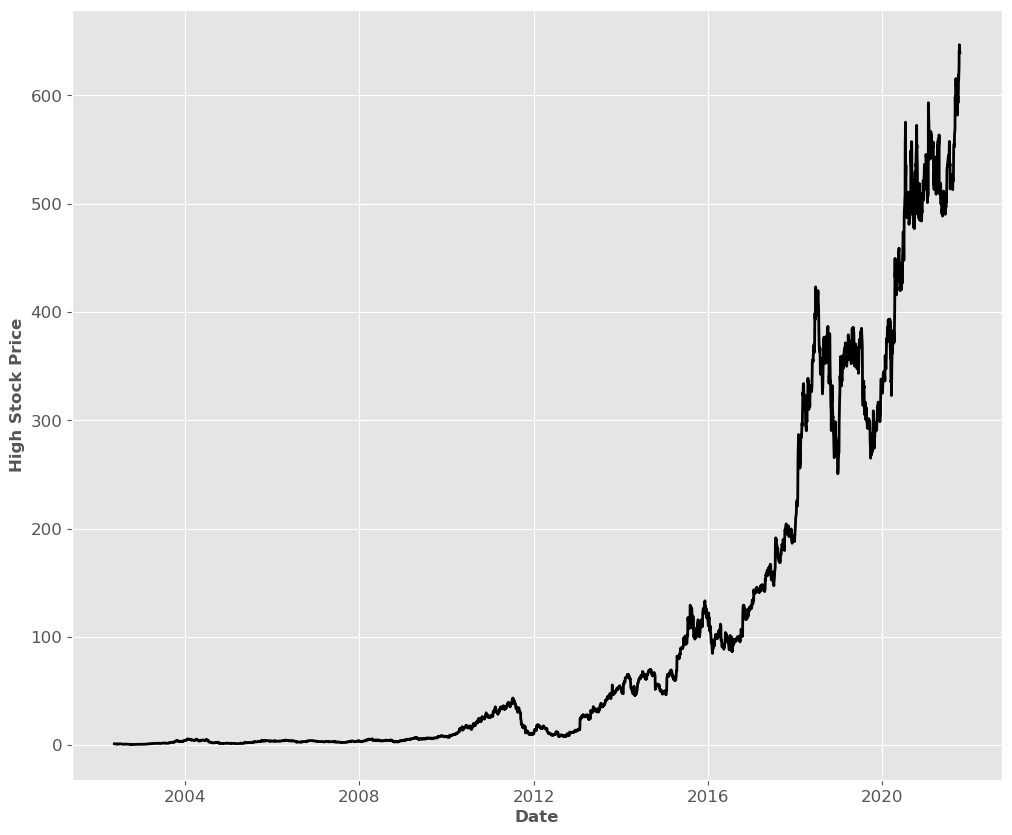

In [12]:
#Virtulization with matplotlib
y = np.array(data.High)
time = np.array(data.Date)
time = pd.to_datetime(time)
plt.plot(time,y,color='k')
plt.ylabel('High Stock Price')
plt.xlabel('Date')

In [ ]:
 1.Long Term Prediction
 **********************

In [19]:
# Assuming calculate_mean_squared_error is defined somewhere in your code
def calculate_mean_squared_error(predictions, actual_values):
    # Your implementation here
    squared_errors = (predictions - actual_values) ** 2
    mse = np.mean(squared_errors)
    return mse

# ... (previous code)

# Define mse_list before the loop
mse_list = []

degrees = np.arange(3, 12, 1)

for d in degrees:
    poly = PolynomialFeatures(d)
    new_X_train = poly.fit_transform(X_train)
    lr = LinearRegression()
    lr.fit(new_X_train, y_train)
    new_X_val = poly.fit_transform(X_val)
    y_pred = lr.predict(new_X_val)
    
    # Use the actual variable for mean squared error
    mse_val = calculate_mean_squared_error(y_pred, y_val)
    mse_list.append(mse_val)

# Now mse_list contains mean squared errors for each degree


In [20]:
mse_data = pd.DataFrame({'MSE':mse_list,'Degrees':degrees})
mse_data.sort_values(by='MSE')

,MSE,Degrees
0,2985.976591,3
2,3473.201604,5
3,4000.106905,6
1,4434.413562,4
4,12439.153942,7
5,35626.226296,8
6,80279.939320,9
7,152892.475978,10
8,259215.908033,11


In [ ]:
#the model with lowest MSE is the one with degrees = 3

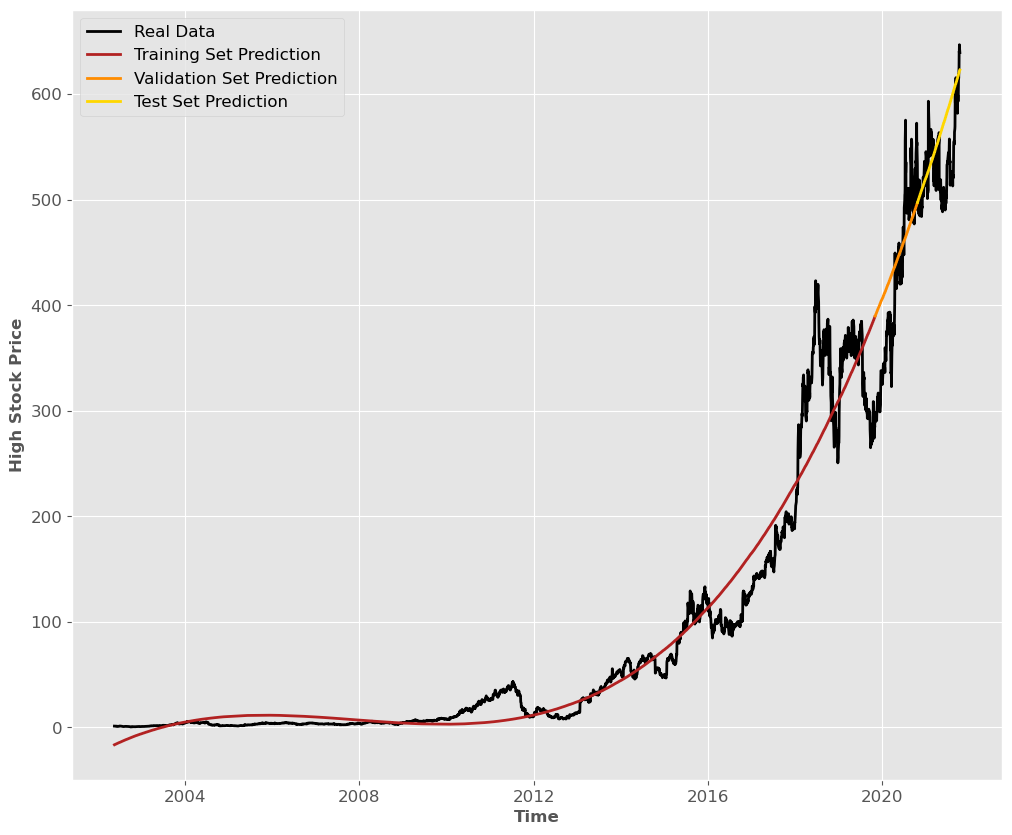

In [21]:
train_split = int(len(y)*0.9)
val_split = int(len(y)*0.05)
y_train = y[0:train_split]
X_train = np.arange(0,len(y_train),1).reshape(-1,1)
X_tot =  np.arange(0,len(y),1).reshape(-1,1)
opt_degree = 3
poly = PolynomialFeatures(opt_degree)
new_X_tot = poly.fit_transform(X_tot)
new_X_train = poly.fit_transform(X_train)
new_X_val = poly.fit_transform(X_val)
new_X_test = poly.fit_transform(X_test)
lr = LinearRegression()
lr.fit(new_X_train,y_train)
y_pred_train = lr.predict(new_X_train)
y_pred_val = lr.predict(new_X_val)
y_pred_test = lr.predict(new_X_test)
plt.plot(time,y,color='k',label='Real Data')
plt.xlabel('Time')
plt.ylabel('High Stock Price')
plt.plot(time[0:train_split],y_pred_train,color='firebrick',label='Training Set Prediction')
plt.plot(time[train_split:train_split+val_split],y_pred_val,color='darkorange',label='Validation Set Prediction')
plt.plot(time[train_split+val_split::],y_pred_test,color='gold',label='Test Set Prediction')
plt.legend()

In [23]:
#Simultaneous predictions
y_pred = lr.predict(new_X_tot)

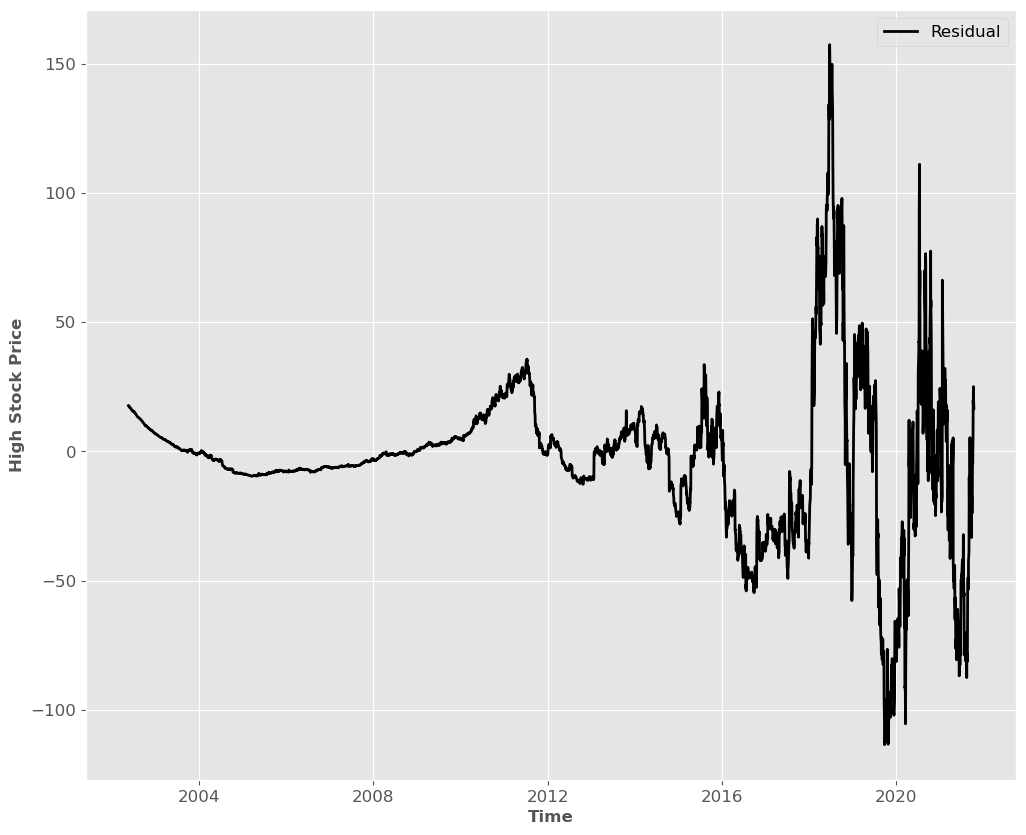

In [24]:
y_detrend = y-y_pred
plt.plot(time,y_detrend,label='Residual',color='k')
plt.xlabel('Time')
plt.ylabel('High Stock Price')
plt.legend()

In [25]:
#rename columns in a Pandas Dataframe
detrend_data = pd.DataFrame([time,y_detrend]).T
detrend_data = detrend_data.rename(columns={0:'Date',1:'y'})

In [ ]:
2. Middle Term Prediction
************************

In [26]:
month_data=pd.DataFrame(detrend_data.groupby(pd.PeriodIndex(detrend_data['Date'], freq="M"))['y'].mean())
month_data=month_data.reset_index()
month_data['Date']=pd.to_datetime(month_data.Date,errors='ignore')
to_plot_month = month_data.loc[np.linspace(month_data.index.min(),month_data.index.max(),5).astype(int)]

Text(0, 0.5, 'High Stock Price')

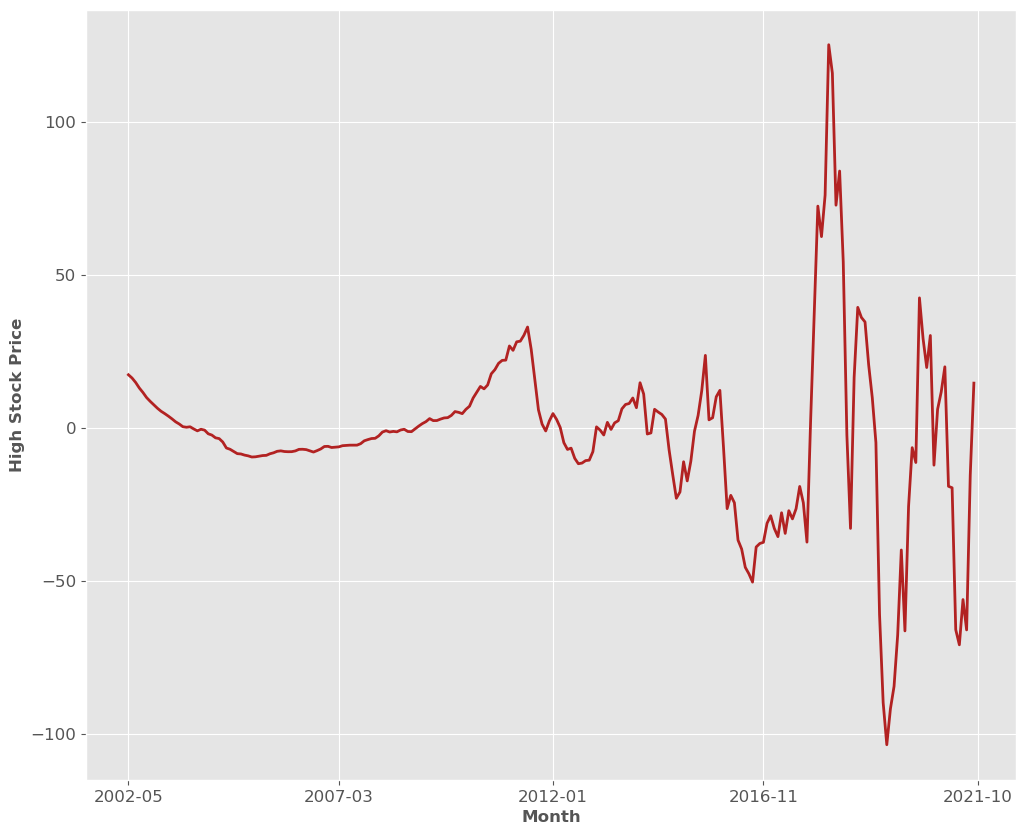

In [27]:
plt.plot(month_data['y'],color='firebrick')
plt.xticks(np.linspace(0,234,5).astype(int),to_plot_month.Date)
plt.xlabel('Month')
plt.ylabel('High Stock Price')

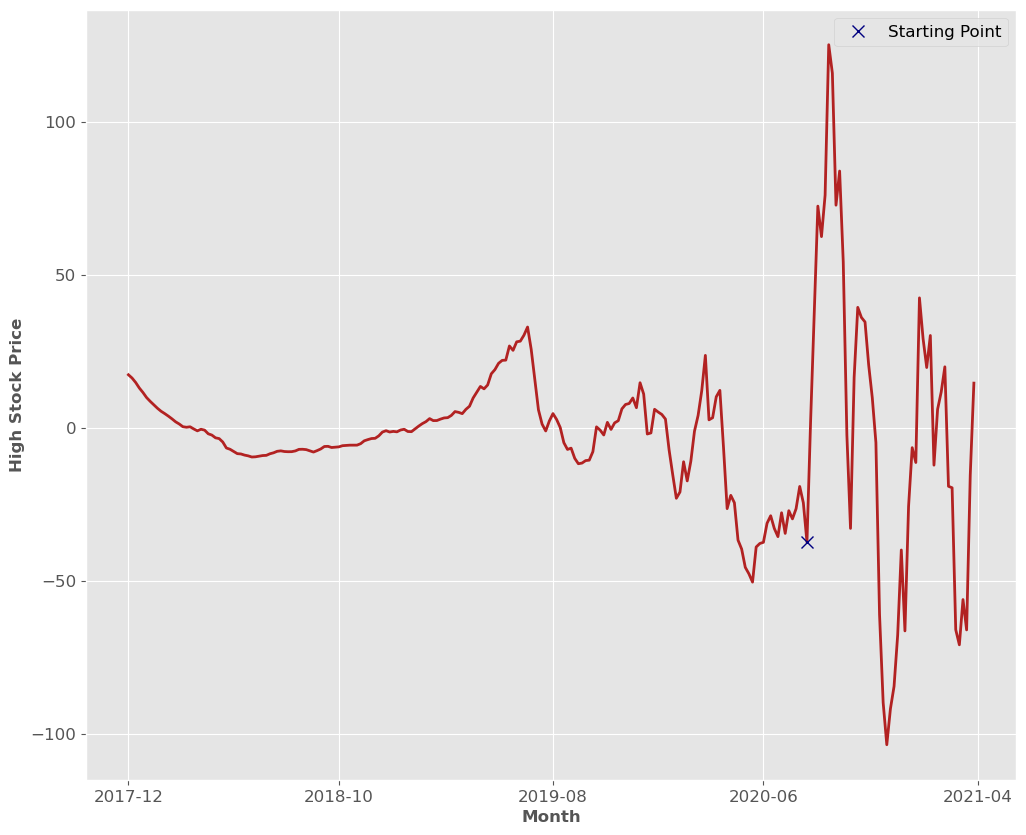

In [32]:
stop_time = 187
plt.plot(month_data['y'],color='firebrick')
plt.plot(stop_time,month_data['y'][stop_time],'x',color='navy',label='Starting Point')
plt.xticks(np.linspace(0,len(month_data),5).astype(int),to_plot_month)
plt.xlabel('Month')
plt.ylabel('High Stock Price')
plt.legend()


In [30]:
new_data = month_data[stop_time::]
new_data = new_data.reset_index().drop('index',axis=1)
new_year_index = 38
new_data_train = new_data[0:new_year_index+1]
new_data_test = new_data[new_year_index:new_year_index+3]
to_plot_index = np.linspace(new_data.index.min(),new_data_test.index.max(),5).astype(int)
to_plot_month = new_data.loc[to_plot_index].Date
series = new_data_train.y

Text(0, 0.5, 'High Stock Price')

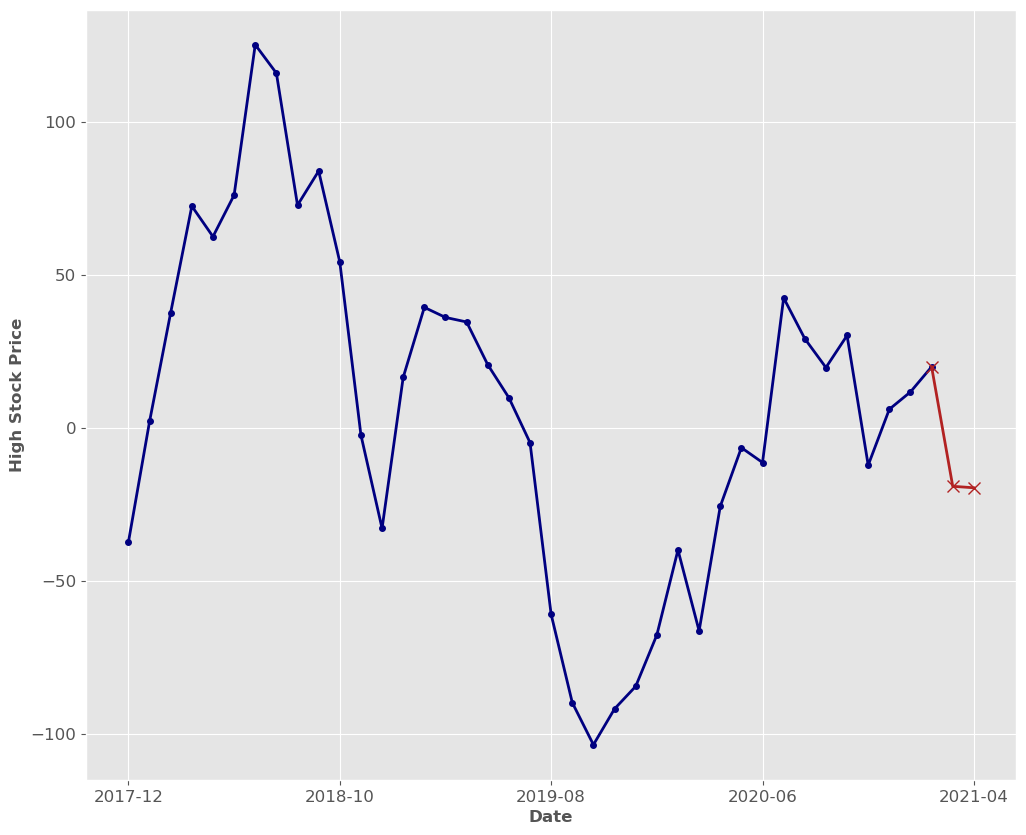

In [31]:
plt.plot(new_data_train.index,new_data_train.y,color='navy',marker='.',label='Training Set')
plt.plot(new_data_test.index,new_data_test.y,color='firebrick',marker='x',label='Test Set')
plt.xticks(to_plot_index,to_plot_month)
plt.xlabel('Date')
plt.ylabel('High Stock Price')

Text(0, 0.5, 'High Stock Price')

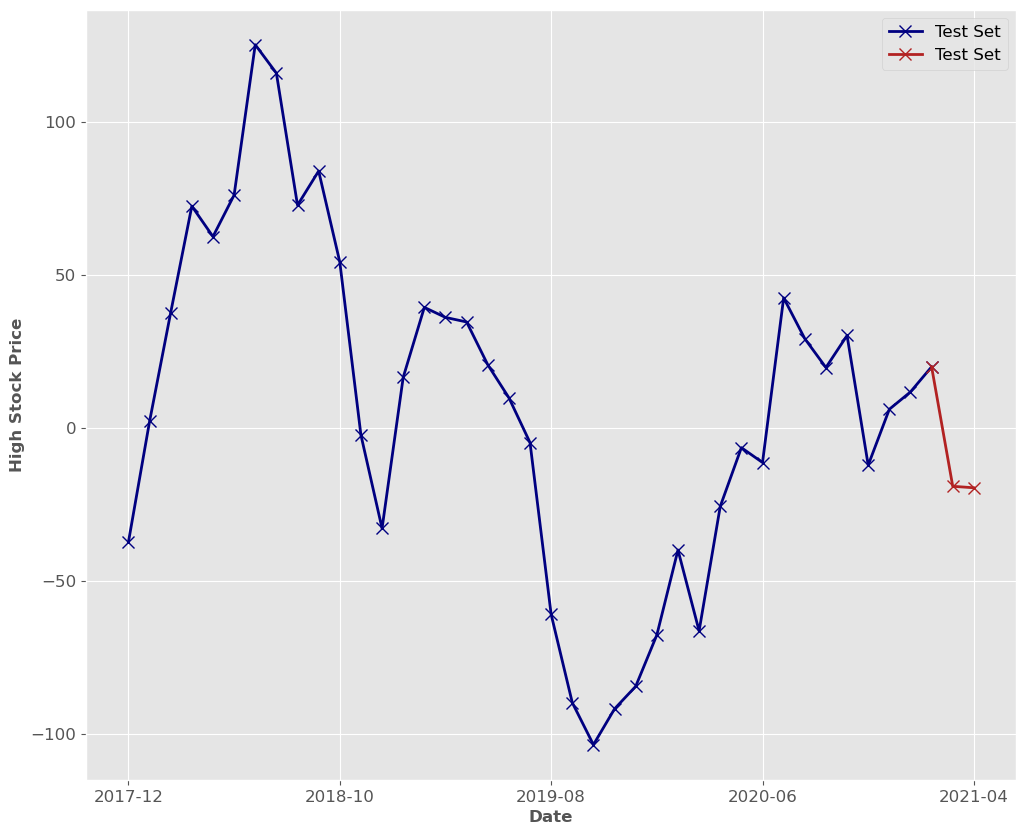

In [45]:
plt.plot(new_data_train.index,new_data_train.y[0::],color='navy',marker='x',label='Test Set')
plt.plot(new_data_test.index,new_data_test.y[0::],color='firebrick',marker='x',label='Test Set')


plt.legend()
plt.xticks(to_plot_index,to_plot_month)
plt.xlabel('Date')
plt.ylabel('High Stock Price')

Text(0, 0.5, 'High Stock Price')

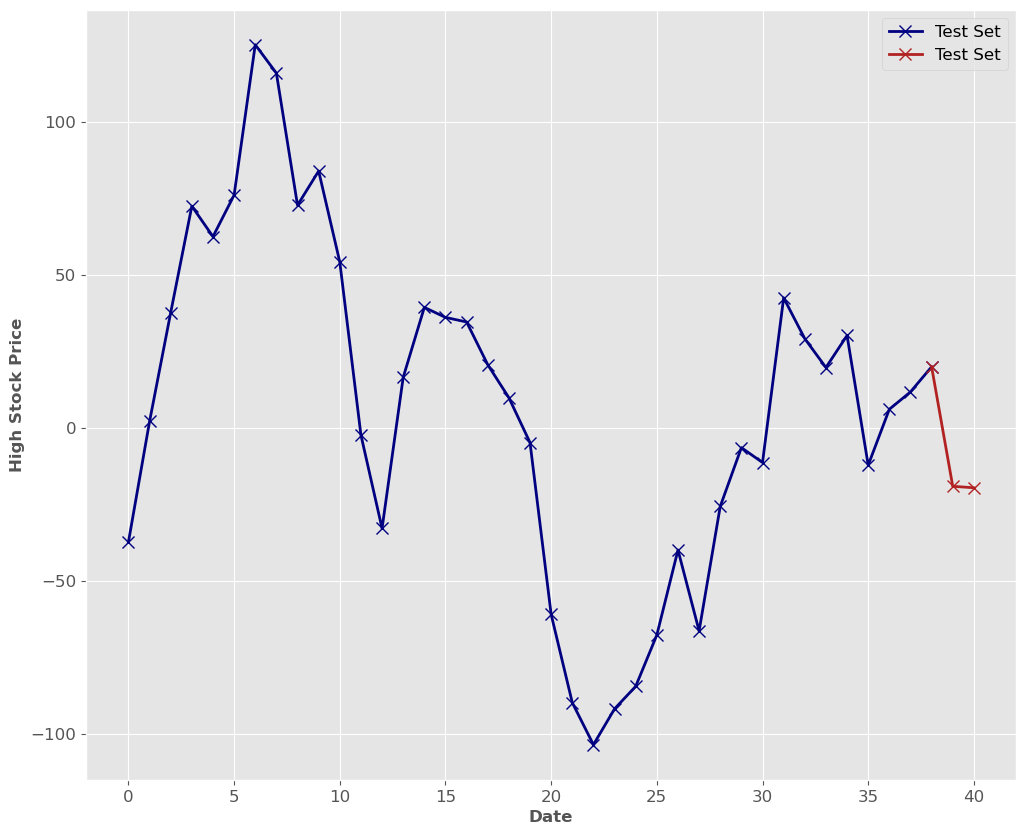

In [50]:
plt.plot(new_data_train.index,new_data_train.y[0::],color='navy',marker='x',label='Test Set')
plt.plot(new_data_test.index,new_data_test.y[0::],color='firebrick',marker='x',label='Test Set')

plt.legend()

plt.xlabel('Date')
plt.ylabel('High Stock Price')

In [ ]:
3. Short Term Prediction
************************

In [52]:
min_month_index = detrend_data[detrend_data['Date']=='2017-12-01'].index[0]
min_index = min_month_index + np.argmin(detrend_data[min_month_index:min_month_index+30].y)

In [53]:
new_data = detrend_data[min_index::]
new_data = new_data.reset_index().drop('index',axis=1)

Text(0, 0.5, 'High Stock Price')

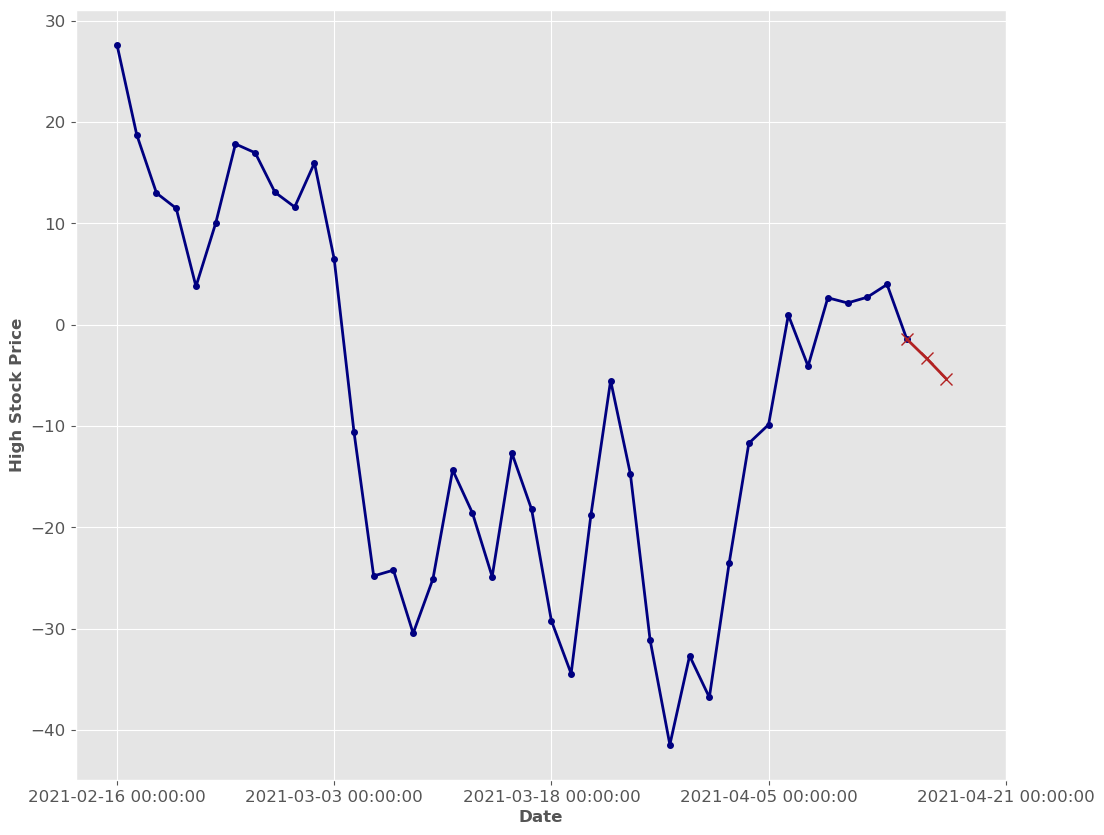

In [54]:
new_data = new_data.loc[new_data.index.max()-200+35:new_data.index.max()-200+45+35].reset_index().drop('index',axis=1)
train_size = 40
new_data_train = new_data[0:train_size+1]
new_data_test = new_data[train_size:43]
to_plot_index = np.linspace(new_data.index.min(),new_data.index.max(),5).astype(int)
to_plot_day = new_data.loc[to_plot_index].Date
series = new_data_train.y
plt.plot(new_data_train.index,new_data_train.y,color='navy',marker='.',label='Training Set')
plt.plot(new_data_test.index,new_data_test.y,color='firebrick',marker='x',label='Test Set')
plt.xticks(to_plot_index,to_plot_day)
plt.xlabel('Date')
plt.ylabel('High Stock Price')

In [56]:
series = series.astype('float')

In [57]:
ps = range(0, 10, 1)
d = 0
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = series)

C:\Users\SDEVLOOP\AppData\Local\Temp\ipykernel_6052\912339691.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/100 [00:00<?, ?it/s]

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sar

In [58]:
result_d_0.head()

,"(p, d, q)",AIC
0,"(1, 0, 1)",294.642347
1,"(2, 0, 0)",295.649036
2,"(2, 0, 1)",296.337997
3,"(3, 0, 0)",296.429659
4,"(1, 0, 2)",296.499609


In [59]:
best_models = result_d_0.sort_values(by='AIC', ascending=True).reset_index(drop=True).head()
best_model_params_0 = best_models[best_models.columns[0]][0]
best_model_0 = SARIMAX(series, order=best_model_params_0).fit()
print(best_model_0.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   41
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -144.321
Date:                Wed, 22 Nov 2023   AIC                            294.642
Time:                        10:21:16   BIC                            299.783
Sample:                             0   HQIC                           296.514
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8432      0.089      9.493      0.000       0.669       1.017
ma.L1          0.3768      0.158      2.392      0.017       0.068       0.686
sigma2        63.7345     23.080      2.761      0.0

In [60]:
test_size = len(new_data_test)
fore_l= test_size+3
forecast = best_model_0.get_prediction(start=train_size+1, end=train_size+fore_l-3)
forec = forecast.predicted_mean
ci = forecast.conf_int(alpha=0.25)

In [ ]:
Final part
**********

Text(0, 0.5, 'High Stock Price')

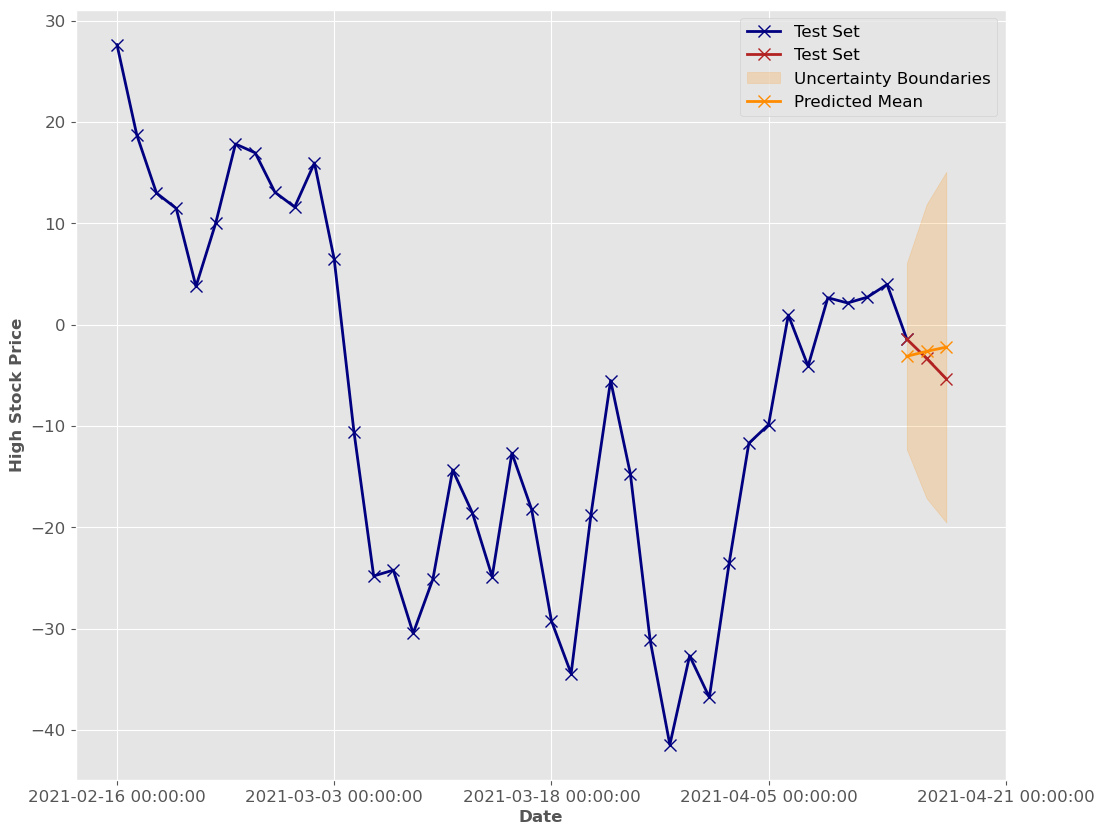

In [61]:
plt.plot(new_data_train.index,new_data_train.y[0::],color='navy',marker='x',label='Test Set')
plt.plot(new_data_test.index,new_data_test.y[0::],color='firebrick',marker='x',label='Test Set')
plt.fill_between(new_data_test.index,ci['lower y'],ci['upper y'],alpha=0.2,color='darkorange',label='Uncertainty Boundaries')
plt.plot(new_data_test.index.tolist(),forec,label='Predicted Mean',color='darkorange',marker='x')
plt.legend()
plt.xticks(to_plot_index,to_plot_day)
plt.xlabel('Date')
plt.ylabel('High Stock Price')